In [1]:
import re
import itertools

# Load the dataset
with open("/content/hindi.pos", "r", encoding="utf-8") as file:
    dataset_content = file.read()

# Extract sentences and their POS tags
sentences = re.findall(r'<Sentence id=\d+>.*?</Sentence>', dataset_content, re.DOTALL)

all_sentences = []
all_tags = []

for sentence in sentences:
    sentence_text = re.search(r'>(.*?)</Sentence>', sentence, re.DOTALL).group(1)
    tagged_words = sentence_text.strip().split()

    # Separate words and tags
    words = []
    tags = []
    for tagged_word in tagged_words:
        word, tag = tagged_word.rsplit("_", 1)
        words.append(word)
        tags.append(tag)

    all_sentences.append(words)
    all_tags.append(tags)

print(all_sentences)
print(all_tags)


[['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक'], ['संयुक्त', 'राष्ट्र', '।'], ['इराक', 'के', 'विदेश', 'मंत्री', 'ने', 'अमरीका', 'के', 'उस', 'प्रस्ताव', 'का', 'मजाक', 'उड़ाया', 'है', ',', 'जिसमें', 'अमरीका', 'ने', 'संयुक्त', 'राष्ट्र', 'के', 'प्रतिबंधों', 'को', 'इराकी', 'नागरिकों', 'के', 'लिए', 'कम', 'हानिकारक', 'बनाने', 'के', 'लिए', 'कहा', 'है', '।'], ['विदेश', 'मंत्री', 'का', 'कहना', 'है', 'कि', 'चूंकि', 'बगदाद', 'संयुक्त', 'राष्ट्र', 'की', 'मांगों', 'का', 'पालन', 'करते', 'हुए', 'अपने', 'भारी', 'विनाशकारी', 'हथियारों', 'को', 'नष्ट', 'कर', 'रहा', 'है', '।'], ['लिहाजा', 'प्रतिबंधों', 'को', 'पूर्ण', 'रूप', 'से', 'उठा', 'दिया', 'जाना', 'चाहिए', '।'], ['विदेश', 'मंत्री', 'मोहम्मद', 'सईद', 'का', 'कहना', 'है', 'कि', 'वे', 'इसे', "'सुव्यवस्थित", "प्रतिबंध'", 'कह', 'कर', 'आम', 'राय', 'और', 'सुरक्षा', 'परिषद', 'को', 'छल', 'रहे', 'हैं', '।'], ['बेनजीर', 'की', 'सुनवाई', 'स्थगित'], ['कराची', '।'], ['पाकिस्तान', 'की', 'पूर्व', 'प्रधानमंत्री', 'बेनजीर', 'भुट्टो', 'पर', 'लगे', 'भ्रष्टाचार', 'के', 'आरोपों'

In [2]:
from collections import defaultdict

# Initialize the pair pattern matrix
pair_pattern_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

# Function to extract adjacent NN-Verb-NN patterns from a list of POS tags and words
def extract_adjacent_nn_prep_nn_patterns(tags, words):
    patterns = []
    for i in range(len(tags) - 2):
        if tags[i].startswith("NN") and tags[i+1].startswith("PREP") and tags[i+2].startswith("NN"):
            patterns.append((words[i], words[i+2], words[i+1]))
    return patterns

# Iterate through all sentences and extract patterns
for tags, words in zip(all_tags, all_sentences):
    patterns = extract_adjacent_nn_prep_nn_patterns(tags, words)

    # Update the pair pattern matrix
    for pattern in patterns:
        noun1, noun2, prep = pattern
        pair_pattern_matrix[noun1][noun2][prep] += 1

# Print the pair pattern matrix with words
for noun1, noun2_dict in pair_pattern_matrix.items():
    for noun2, prep_dict in noun2_dict.items():
        for prep, frequency in prep_dict.items():
            print(f"({noun1}, {noun2}, {prep}): {frequency}")


(इराक, विदेश, के): 1
(मंत्री, अमरीका, ने): 1
(मंत्री, झूठ, ने): 1
(अमरीका, संयुक्त, ने): 1
(अमरीका, ओसमा, द्वारा): 1
(अमरीका, राष्ट्रपति, में): 1
(अमरीका, डिपुटी, के): 1
(अमरीका, जॉन, के): 1
(राष्ट्र, प्रतिबंधों, के): 1
(राष्ट्र, मांगों, की): 1
(राष्ट्र, महासचिव, के): 1
(राष्ट्र, प्रवक्ता, के): 1
(राष्ट्र, मानवाधिकार, के): 1
(बेनजीर, सुनवाई, की): 1
(भ्रष्टाचार, आरोपों, के): 1
(याचिका, सुनवाई, की): 1
(मंगलवार, वकीलों, को): 1
(वकीलों, हड़ताल, की): 1
(एसोसिएशन, अध्यक्ष, के): 1
(अदालतों, स्तर, के): 1
(प्रजातंत्र, स्थापना, की): 1
(स्थापना, मांग, की): 1
(कोर्ट, भुट्टो, में): 1
(मामले, सुनवाई, की): 1
(मामले, राजग, पर): 1
(मामले, जीत, में): 1
(मामले, न्यायाधीश, में): 1
(मामले, यूरोपभर, में): 1
(मामले, जेकेएलएफ, में): 1
(मुशर्रफ, सऊदी, द्वारा): 1
(मुशर्रफ, बुधवार, की): 1
(अरब, कश्मीर, को): 1
(मुद्दे, भारत, पर): 1
(मुद्दे, चर्चा, पर): 1
(मुद्दे, ठाकरे, पर): 1
(पाकिस्तान, मध्यस्थता, की): 1
(पाकिस्तान, मानव, में): 1
(पाकिस्तान, आसपास, के): 1
(पाकिस्तान, बेकारी, में): 1
(पाकिस्तान, गृह, के): 1
(पाकि

In [3]:
# Initialize a set to store unique elements
rows = set()
columns=set()
height=set()

# Iterate through the pair pattern matrix and add unique elements
for noun1, noun2_dict in pair_pattern_matrix.items():
    for noun2, prep_dict in noun2_dict.items():
        for prep in prep_dict.keys():
            rows.add(noun1)
            columns.add(noun2)
            height.add(prep)

# Calculate the size of the matrix (number of unique elements)


# Print the size of the matrix
print("Size of the matrix:",len(rows)," x",len(columns)," x ",len(height))


Size of the matrix: 355  x 382  x  11


In [4]:
import nltk
nltk.download('treebank')


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [16]:
# load POS tagged corpora from NLTK
from nltk.corpus import treebank


treebank_corpus = treebank.tagged_sents(tagset='universal')

tagged_sentences = treebank_corpus


In [19]:
# Specify the file path where you want to save the text file in Colab
output_file_path = "/content/all_sentences.txt"

# Iterate through tagged sentences and save each to the text file with a new line for each sentence
with open(output_file_path, "w", encoding="utf-8") as output_file:
    for tagged_sentence in tagged_sentences:
        # Join the words and tags in the sentence and write to the file with a new line character
        sentence_text = ' '.join([f"{word}_{tag}" for word, tag in tagged_sentence])
        output_file.write(sentence_text + "\n")

print(f"All sentences have been saved to {output_file_path}.")


All sentences have been saved to /content/all_sentences.txt.


In [15]:
tagged_sentences=tagged_sentences[:100]
print(tagged_sentences)

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], ...]


In [9]:
import nltk
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [10]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert tagged sentences to plain text sentences
def tagged_to_text(tagged_sentence):
    return ' '.join([word for word, tag in tagged_sentence])

plain_text_sentences = [tagged_to_text(tagged_sentence) for tagged_sentence in tagged_sentences]

# Train a Word2Vec model on the plain text sentences
tokenized_sentences = [sentence.split() for sentence in plain_text_sentences]
word2vec_model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)

# Convert plain text sentences to TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(plain_text_sentences)

# Calculate Cosine Similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Define a function to calculate soft cosine similarity (same as before)
def soft_cosine_similarity(sentence1, sentence2):
    tokens1 = sentence1.split()
    tokens2 = sentence2.split()

    vector1 = np.mean([word2vec_model.wv[token] for token in tokens1 if token in word2vec_model.wv], axis=0)
    vector2 = np.mean([word2vec_model.wv[token] for token in tokens2 if token in word2vec_model.wv], axis=0)

    soft_cosine = cosine_similarity(vector1.reshape(1, -1), vector2.reshape(1, -1), dense_output=False)

    return soft_cosine[0, 0]

# Calculate Soft Cosine Similarity for all sentence pairs (same as before)
soft_cosine_similarities = np.zeros((len(plain_text_sentences), len(plain_text_sentences)))
for i in range(len(plain_text_sentences)):
    for j in range(len(plain_text_sentences)):
        soft_cosine_similarities[i, j] = soft_cosine_similarity(plain_text_sentences[i], plain_text_sentences[j])

# Print the results
print("Cosine Similarity:")
print(cosine_similarities)
print("\nSoft Cosine Similarity:")
print(soft_cosine_similarities)


Cosine Similarity:
[[1.         0.10975085 0.20688955 ... 0.0401786  0.05979196 0.00861912]
 [0.10975085 1.         0.08424405 ... 0.         0.07424789 0.01073415]
 [0.20688955 0.08424405 1.         ... 0.01064619 0.04202038 0.0157862 ]
 ...
 [0.0401786  0.         0.01064619 ... 1.         0.32942614 0.17782338]
 [0.05979196 0.07424789 0.04202038 ... 0.32942614 1.         0.15440939]
 [0.00861912 0.01073415 0.0157862  ... 0.17782338 0.15440939 1.        ]]

Soft Cosine Similarity:
[[1.         0.53598654 0.68954694 ... 0.64418817 0.64355147 0.58837479]
 [0.53598654 0.99999994 0.52711624 ... 0.4423753  0.62997693 0.44538668]
 [0.68954694 0.52711624 1.00000012 ... 0.74750006 0.74553049 0.64483285]
 ...
 [0.64418817 0.4423753  0.74750006 ... 0.99999994 0.75899851 0.71077746]
 [0.64355147 0.62997693 0.74553049 ... 0.75899851 1.         0.68074602]
 [0.58837479 0.44538668 0.64483285 ... 0.71077746 0.68074602 0.99999988]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


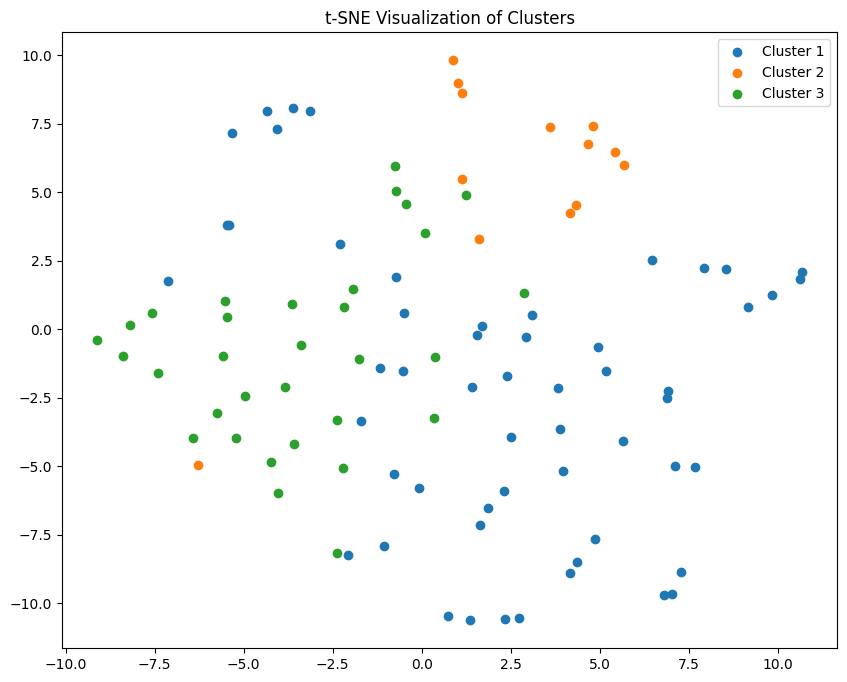

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

dissimilarity_matrix = 1 - cosine_similarities

num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(dissimilarity_matrix)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)  # You can also use n_components=3 for 3D visualization
tsne_embeddings = tsne.fit_transform(dissimilarity_matrix)

# Visualize the clustered sentences using a scatter plot
plt.figure(figsize=(10, 8))
for cluster_id in range(num_clusters):
    plt.scatter(
        tsne_embeddings[cluster_labels == cluster_id, 0],
        tsne_embeddings[cluster_labels == cluster_id, 1],
        label=f'Cluster {cluster_id + 1}',
    )

plt.title('t-SNE Visualization of Clusters')
plt.legend()
plt.show()
